In [1]:
!pip install faiss-cpu

   ---------------------------------------- 0.0/18.2 MB ? eta -:--:--
   --- ------------------------------------ 1.6/18.2 MB 11.9 MB/s eta 0:00:02
   -------- ------------------------------- 3.9/18.2 MB 11.7 MB/s eta 0:00:02
   -------------- ------------------------- 6.6/18.2 MB 11.5 MB/s eta 0:00:02
   ------------------- -------------------- 8.9/18.2 MB 11.5 MB/s eta 0:00:01
   ------------------------ --------------- 11.0/18.2 MB 11.3 MB/s eta 0:00:01
   ---------------------------- ----------- 12.8/18.2 MB 10.7 MB/s eta 0:00:01
   --------------------------------- ------ 15.2/18.2 MB 10.7 MB/s eta 0:00:01
   -------------------------------------- - 17.3/18.2 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 18.2/18.2 MB 10.4 MB/s eta 0:00:00


In [2]:
# STEP 2 IMPORT LIBRARIES

import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

In [3]:
# SETP 3 - CREATE DUMMY DATA SET 

# Build random data
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 data 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query point


In [5]:
# STEP 4 - BUILD EXACT NN MODEL

# Search NN using Exact NN
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

# Compute Exact NN Time
start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # Find 3 NN
end = time.time()
time_flat = end - start

In [6]:
# STEP 5 - BUILD FAISS MODEL 

# Compute FAISS
nlist = 10   # n-cluster (inverted list)
m = 2        # number of subvector
quantizer = faiss.IndexFlatL2(2)   # used by IVF for initiatl cluster
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

In [8]:
# STEP 6 - COMPARE THE PERFORMANCE 

# Print The Peformances
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.0011627674102783203
Waktu IVF+PQ: 0.0009999275207519531


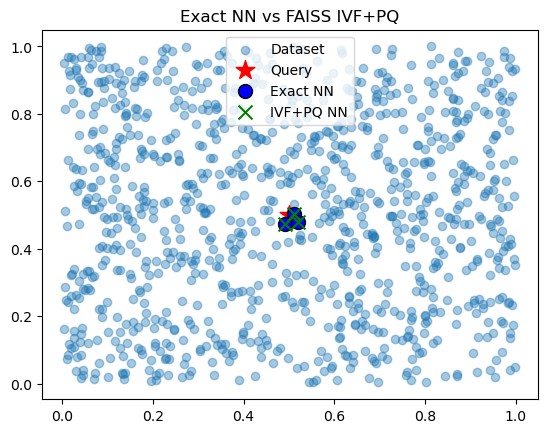

In [9]:
# STEP 7 - VISUALIZE  
# Visualize
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Flat NN -> Exact NN
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# IVF+PQ NN -> FAISS
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Exact NN vs FAISS IVF+PQ")
plt.show()

The visualization shows that the FAISS IVF+PQ algorithm (green 'x') did not identify the same point as the true nearest neighbor (blue circle). While not perfectly accurate, the point it found is extremely close to the correct one.